# RANDOM FOREST REGRESSOR

In [1]:
import numpy as np
import pandas as pd

In [2]:
# membaca data 
home = pd.read_csv("train.csv")
home.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# informasi data 
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# DATA PREPOCESSING

In [4]:
# Menampilkan semua nama kolom
home.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
#Menyeleksi Kolom
homefix = home[['SalePrice', 'LotArea', 'GarageArea', 'OverallCond', 'TotalBsmtSF', 
'FullBath', 'BedroomAbvGr', 'SaleCondition', 'Neighborhood']]
homefix.head()

,SalePrice,LotArea,GarageArea,OverallCond,TotalBsmtSF,FullBath,BedroomAbvGr,SaleCondition,Neighborhood
0,208500,8450,548,5,856,2,3,Normal,CollgCr
1,181500,9600,460,8,1262,2,3,Normal,Veenker
2,223500,11250,608,5,920,2,3,Normal,CollgCr
3,140000,9550,642,5,756,1,3,Abnorml,Crawfor
4,250000,14260,836,5,1145,2,4,Normal,NoRidge


In [6]:
#Mengecek NA/NULL
homefix.isnull().any()

SalePrice        False
LotArea          False
GarageArea       False
OverallCond      False
TotalBsmtSF      False
FullBath         False
BedroomAbvGr     False
SaleCondition    False
Neighborhood     False
dtype: bool

In [7]:
#Ukuran Data
homefix.shape

(1460, 9)

In [8]:
# Deskripsi data homefix untuk variabel numerik 
homefix.describe()

,SalePrice,LotArea,GarageArea,OverallCond,TotalBsmtSF,FullBath,BedroomAbvGr
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,10516.828082,472.980137,5.575342,1057.429452,1.565068,2.866438
std,79442.502883,9981.264932,213.804841,1.112799,438.705324,0.550916,0.815778
min,34900.000000,1300.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,129975.000000,7553.500000,334.500000,5.000000,795.750000,1.000000,2.000000
50%,163000.000000,9478.500000,480.000000,5.000000,991.500000,2.000000,3.000000
75%,214000.000000,11601.500000,576.000000,6.000000,1298.250000,2.000000,3.000000
max,755000.000000,215245.000000,1418.000000,9.000000,6110.000000,3.000000,8.000000


# EDA (Exploratory Data Analysis)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

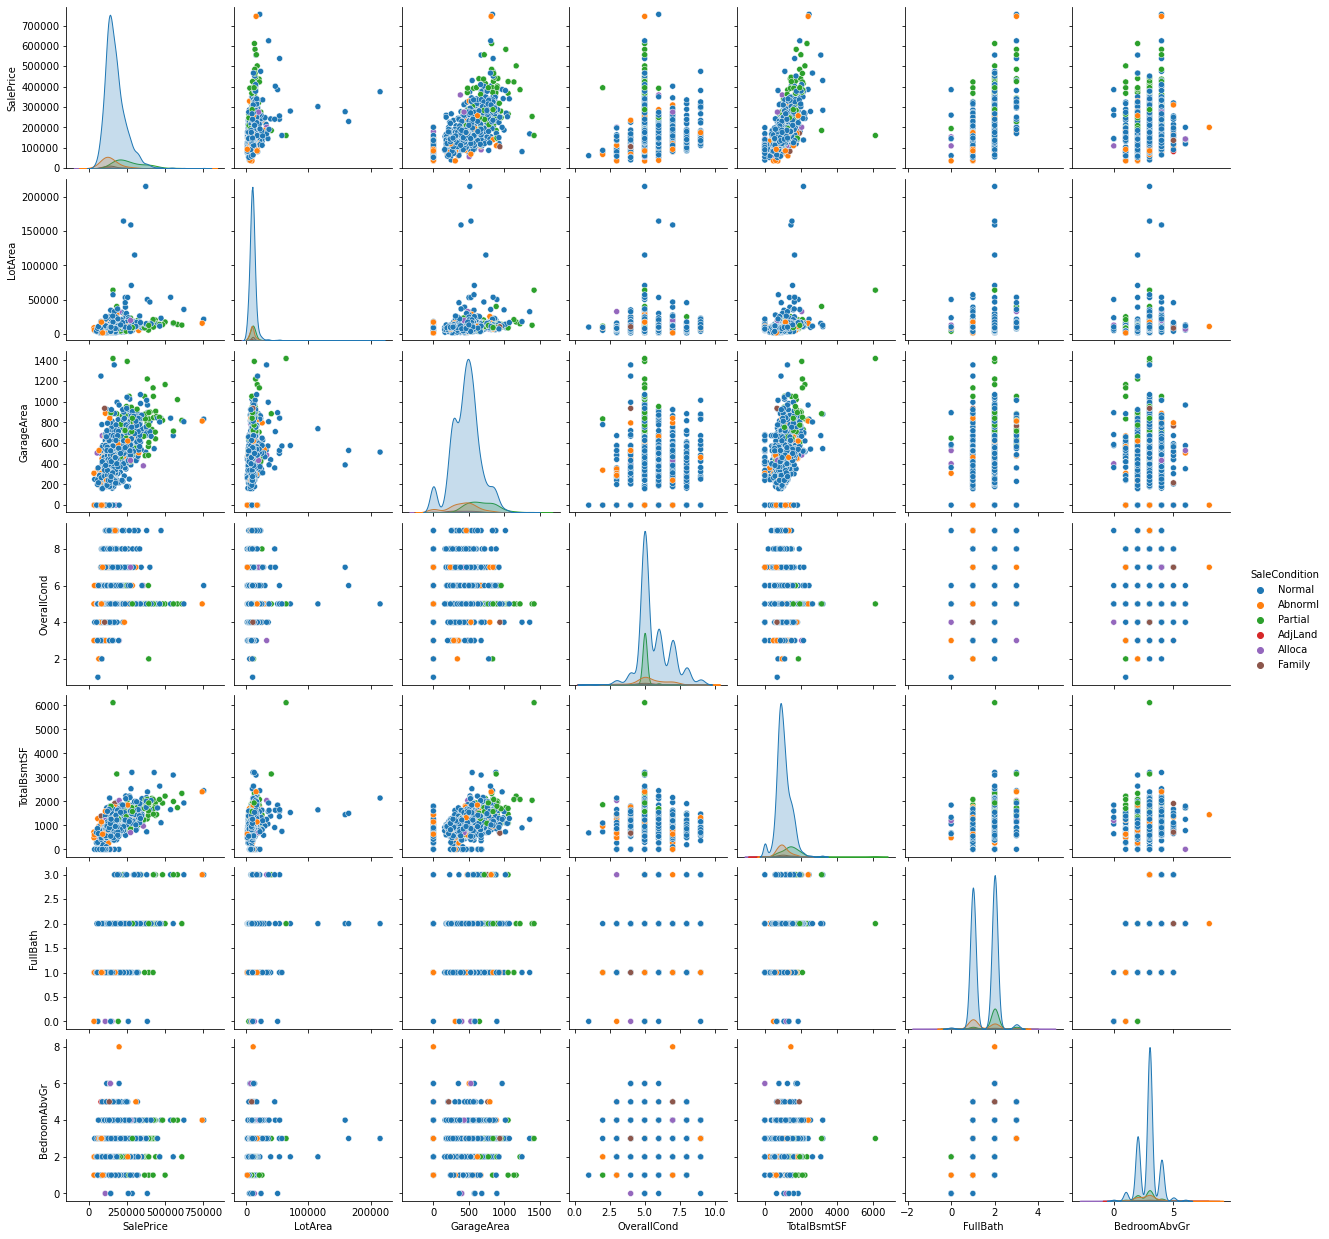

In [10]:
#Pairplot dengan warna nya berdasarkan kategori SaleCondition
sns.pairplot(homefix, hue="SaleCondition")

<AxesSubplot:>

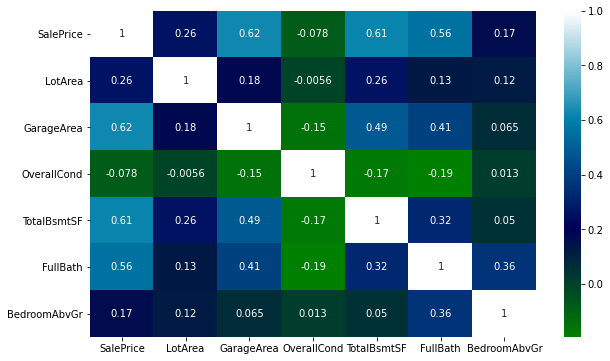

In [11]:
#Heatmap untuk korelasi
plt.figure(figsize=(10,6))
sns.heatmap(homefix.corr(), annot=True,  cmap="ocean")

In [12]:
# Korelasi dengan SalesPrice
homefix.corr().SalePrice.sort_values(ascending=False)

SalePrice       1.000000
GarageArea      0.623431
TotalBsmtSF     0.613581
FullBath        0.560664
LotArea         0.263843
BedroomAbvGr    0.168213
OverallCond    -0.077856
Name: SalePrice, dtype: float64

# MEMBENTUK VARIABEL DUMMY

In [13]:
# Variabel x
x = homefix.drop("SalePrice", axis=1)

In [14]:
# Membentuk variabel dummy 
x = pd.get_dummies(data=x, drop_first=False)
x.head()

,LotArea,GarageArea,OverallCond,TotalBsmtSF,FullBath,BedroomAbvGr,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,8450,548,5,856,2,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9600,460,8,1262,2,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,11250,608,5,920,2,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9550,642,5,756,1,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14260,836,5,1145,2,4,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [15]:
# Variabel Y 
y = homefix.SalePrice

# DATA TRAINING DAN TESTING

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 37)
(292, 37)
(1168,)
(292,)


In [19]:
pd.pandas.set_option('display.max_columns',None)

In [20]:
x_train.head()

,LotArea,GarageArea,OverallCond,TotalBsmtSF,FullBath,BedroomAbvGr,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
318,9900,656,5,1347,2,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
580,14585,572,6,1144,1,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
961,12227,619,7,1330,2,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
78,10778,0,5,1768,2,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,14115,480,5,796,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


# Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
# memanggil model
reg = RandomForestRegressor(n_estimators=100, random_state= 123)


In [23]:
# menginput data
reg.fit(x_train, y_train)

RandomForestRegressor(random_state=123)

In [24]:
# parameter dalam random forest
reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

In [25]:
# prediksi
pred = reg.predict(x_test)
pred

array([192572.7       , 262859.42      , 135707.625     , 217313.65      ,
       136724.5       , 222354.31      , 297886.95      , 142069.        ,
       183288.        , 119658.5       , 152593.5       , 186712.35      ,
       152866.59      , 126967.        , 200838.1       , 173878.        ,
       101754.59      , 260454.12      , 206468.25      , 153439.5       ,
       149799.5       , 191977.        , 119059.        , 132908.15      ,
       227407.19      , 156365.01      , 220422.        , 217227.4       ,
       132090.5       , 148125.35      , 146895.33      , 210059.48      ,
       149071.52      , 255221.4       , 260197.18      , 216289.4       ,
       188401.73      , 260717.36      , 159706.        , 124301.04      ,
       135634.        , 202112.92      , 147701.5       , 164623.4       ,
       223064.15      , 127415.75      , 269281.94      , 242175.05      ,
       222816.2       , 132442.41      , 171301.7       , 217716.5       ,
       146227.        , 1

In [26]:
# Menghitung MAPE
abserror = abs((pred-y_test)/y_test)

# Menampilkan MAPE
print('MAPE: ', round(np.mean(abserror)*100, 4), ' % ')

MAPE:  13.9818  % 


In [27]:
# Menghitung MSE dan RMSE
err2 = (pred-y_test)**2
print('MSE: ', round(np.mean(err2), 4))
print('RMSE: ', round(np.mean(err2**(1/2)),4))

MSE:  1526490797.7924
RMSE:  24836.0716


In [28]:
# Variable importance
imp = list(reg.feature_importances_)
var = list(x_test.columns)

# Membuat list variabel importance
var_imp = [(var, round(imp, 3)) for var, imp in zip(var, imp)]
var_imp

# Mengurutkan variabel importance
var_imp = sorted(var_imp, key = lambda x: x[1], reverse=True)
var_imp

[('TotalBsmtSF', 0.395),
 ('GarageArea', 0.239),
 ('FullBath', 0.139),
 ('LotArea', 0.069),
 ('BedroomAbvGr', 0.028),
 ('OverallCond', 0.021),
 ('Neighborhood_NAmes', 0.014),
 ('Neighborhood_NoRidge', 0.012),
 ('Neighborhood_Crawfor', 0.01),
 ('Neighborhood_NridgHt', 0.01),
 ('SaleCondition_Abnorml', 0.009),
 ('Neighborhood_StoneBr', 0.007),
 ('SaleCondition_Partial', 0.006),
 ('Neighborhood_OldTown', 0.006),
 ('SaleCondition_Normal', 0.004),
 ('Neighborhood_Edwards', 0.004),
 ('Neighborhood_Somerst', 0.004),
 ('Neighborhood_Sawyer', 0.003),
 ('SaleCondition_Alloca', 0.002),
 ('SaleCondition_Family', 0.002),
 ('Neighborhood_ClearCr', 0.002),
 ('Neighborhood_CollgCr', 0.002),
 ('Neighborhood_Gilbert', 0.002),
 ('Neighborhood_SawyerW', 0.002),
 ('Neighborhood_BrkSide', 0.001),
 ('Neighborhood_IDOTRR', 0.001),
 ('Neighborhood_Mitchel', 0.001),
 ('Neighborhood_NPkVill', 0.001),
 ('Neighborhood_NWAmes', 0.001),
 ('Neighborhood_SWISU', 0.001),
 ('Neighborhood_Timber', 0.001),
 ('Neighborhood

# Grafik TREE

In [29]:
# mengekstrak satu pohon
estimator = reg.estimators_[10]

In [30]:
from sklearn.tree import export_graphviz

# Export as dot file
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = x_train.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [31]:
# Konversi dot file ke png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'], shell=True)


1

[Text(531.3160580132256, 533.8928571428571, 'TotalBsmtSF <= 1280.0\nmse = 6127719332.857\nsamples = 760\nvalue = 183263.074'),
 Text(318.1111873928691, 514.4785714285714, 'FullBath <= 1.5\nmse = 2749209750.141\nsamples = 554\nvalue = 155241.905'),
 Text(126.20091044317454, 495.06428571428575, 'GarageArea <= 82.0\nmse = 1085522297.917\nsamples = 317\nvalue = 128670.124'),
 Text(22.65095035242891, 475.65000000000003, 'BedroomAbvGr <= 2.5\nmse = 529266920.439\nsamples = 33\nvalue = 89224.074'),
 Text(10.483084460628255, 456.2357142857143, 'TotalBsmtSF <= 345.0\nmse = 482457127.992\nsamples = 18\nvalue = 80164.516'),
 Text(2.9951669887509302, 436.8214285714286, 'TotalBsmtSF <= 132.0\nmse = 54941875.0\nsamples = 3\nvalue = 50825.0'),
 Text(1.4975834943754651, 417.40714285714284, 'mse = 0.0\nsamples = 1\nvalue = 39300.0'),
 Text(4.492750483126395, 417.40714285714284, 'OverallCond <= 4.5\nmse = 14222222.222\nsamples = 2\nvalue = 54666.667'),
 Text(2.9951669887509302, 397.99285714285713, 'mse 

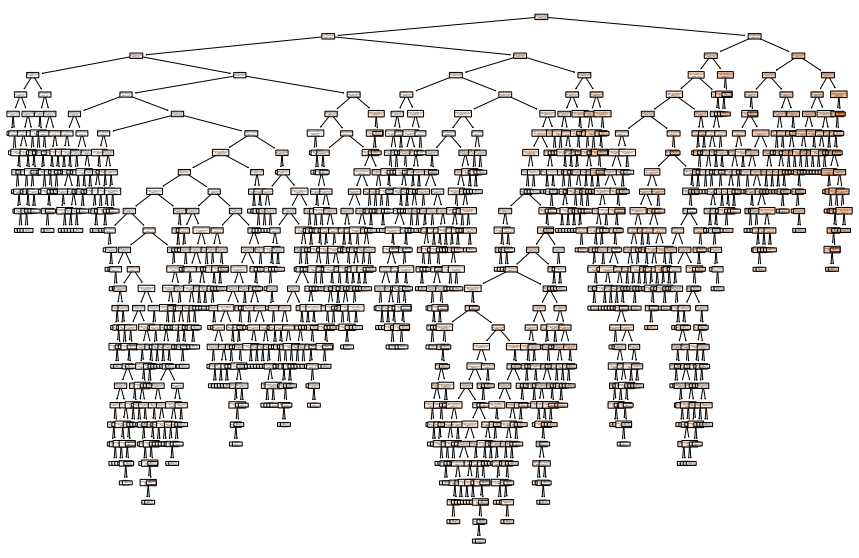

In [38]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15,10))
plot_tree(reg.estimators_[0],
    feature_names=x_train.columns,
    filled=True, impurity=True,
    rounded=True)

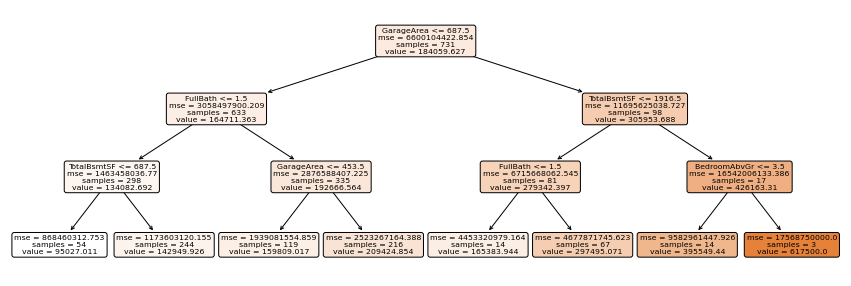

In [44]:
# SMALL TREE
# Create regressor object

reg = RandomForestRegressor(n_estimators=10, max_depth=3)

#fit the regressor with x and y data
reg.fit(x_train, y_train)

fig = plt.figure(figsize=(15,5))
plot_tree(reg.estimators_[0],
          feature_names = x_train.columns,
          filled = True, impurity = True,
          rounded = True)
plt.savefig('smalltree.png')

TUNNING PARAMETER 

In [45]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [46]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

# Random search pf parameters, using 3 fold cross validatiom
# Search across 100 different combinations and use all avaible cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.9min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [47]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}